<a href="https://colab.research.google.com/github/maitreyee-github/AI-Learning/blob/main/Housing_Price_Prediction_local_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/maitreyee-github/AI-Learning/blob/main/Housing_Price_Prediction_local_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Big Picture  ( WHAT ?)**

**What are we planning to do ?** High Level thought process.

 Build Housing pricing Model based in information available from a jurisdiction.




# **Business Ojective (WHY?)**

Median house price needs to be predicted

# Dataset acquisition

# Approach to solution

In [594]:
import os
import tarfile
import urllib
import pandas as pd
import numpy as np
import pathlib
import matplotlib #
import matplotlib.pyplot as plt
print("matplotlib: {}".format(matplotlib.__version__))
import seaborn as sns
print("seaborn: {}".format(sns.__version__))

matplotlib: 3.9.2
seaborn: 0.13.2


In [596]:
data_path="housing.csv"
df=pd.read_csv(data_path)

In [598]:
df.head(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,241400,NEAR BAY
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,NEAR BAY
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,261100,NEAR BAY


In [600]:
df.describe() # To see the nummerical attributes (continuous)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [602]:
df.shape

(20640, 10)

In [604]:
df["ocean_proximity"].value_counts # To see the categorical attributes(categorical)

<bound method IndexOpsMixin.value_counts of 0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object>

In [606]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)


In [608]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"


In [610]:
# Common imports
import numpy as np
import os

In [612]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.rc('axes', labelsize=14)
#mpl.rc('xtick', labelsize=12)
#mpl.rc('ytick', labelsize=12)


In [614]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [616]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [618]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [620]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Saving figure attribute_histogram_plots


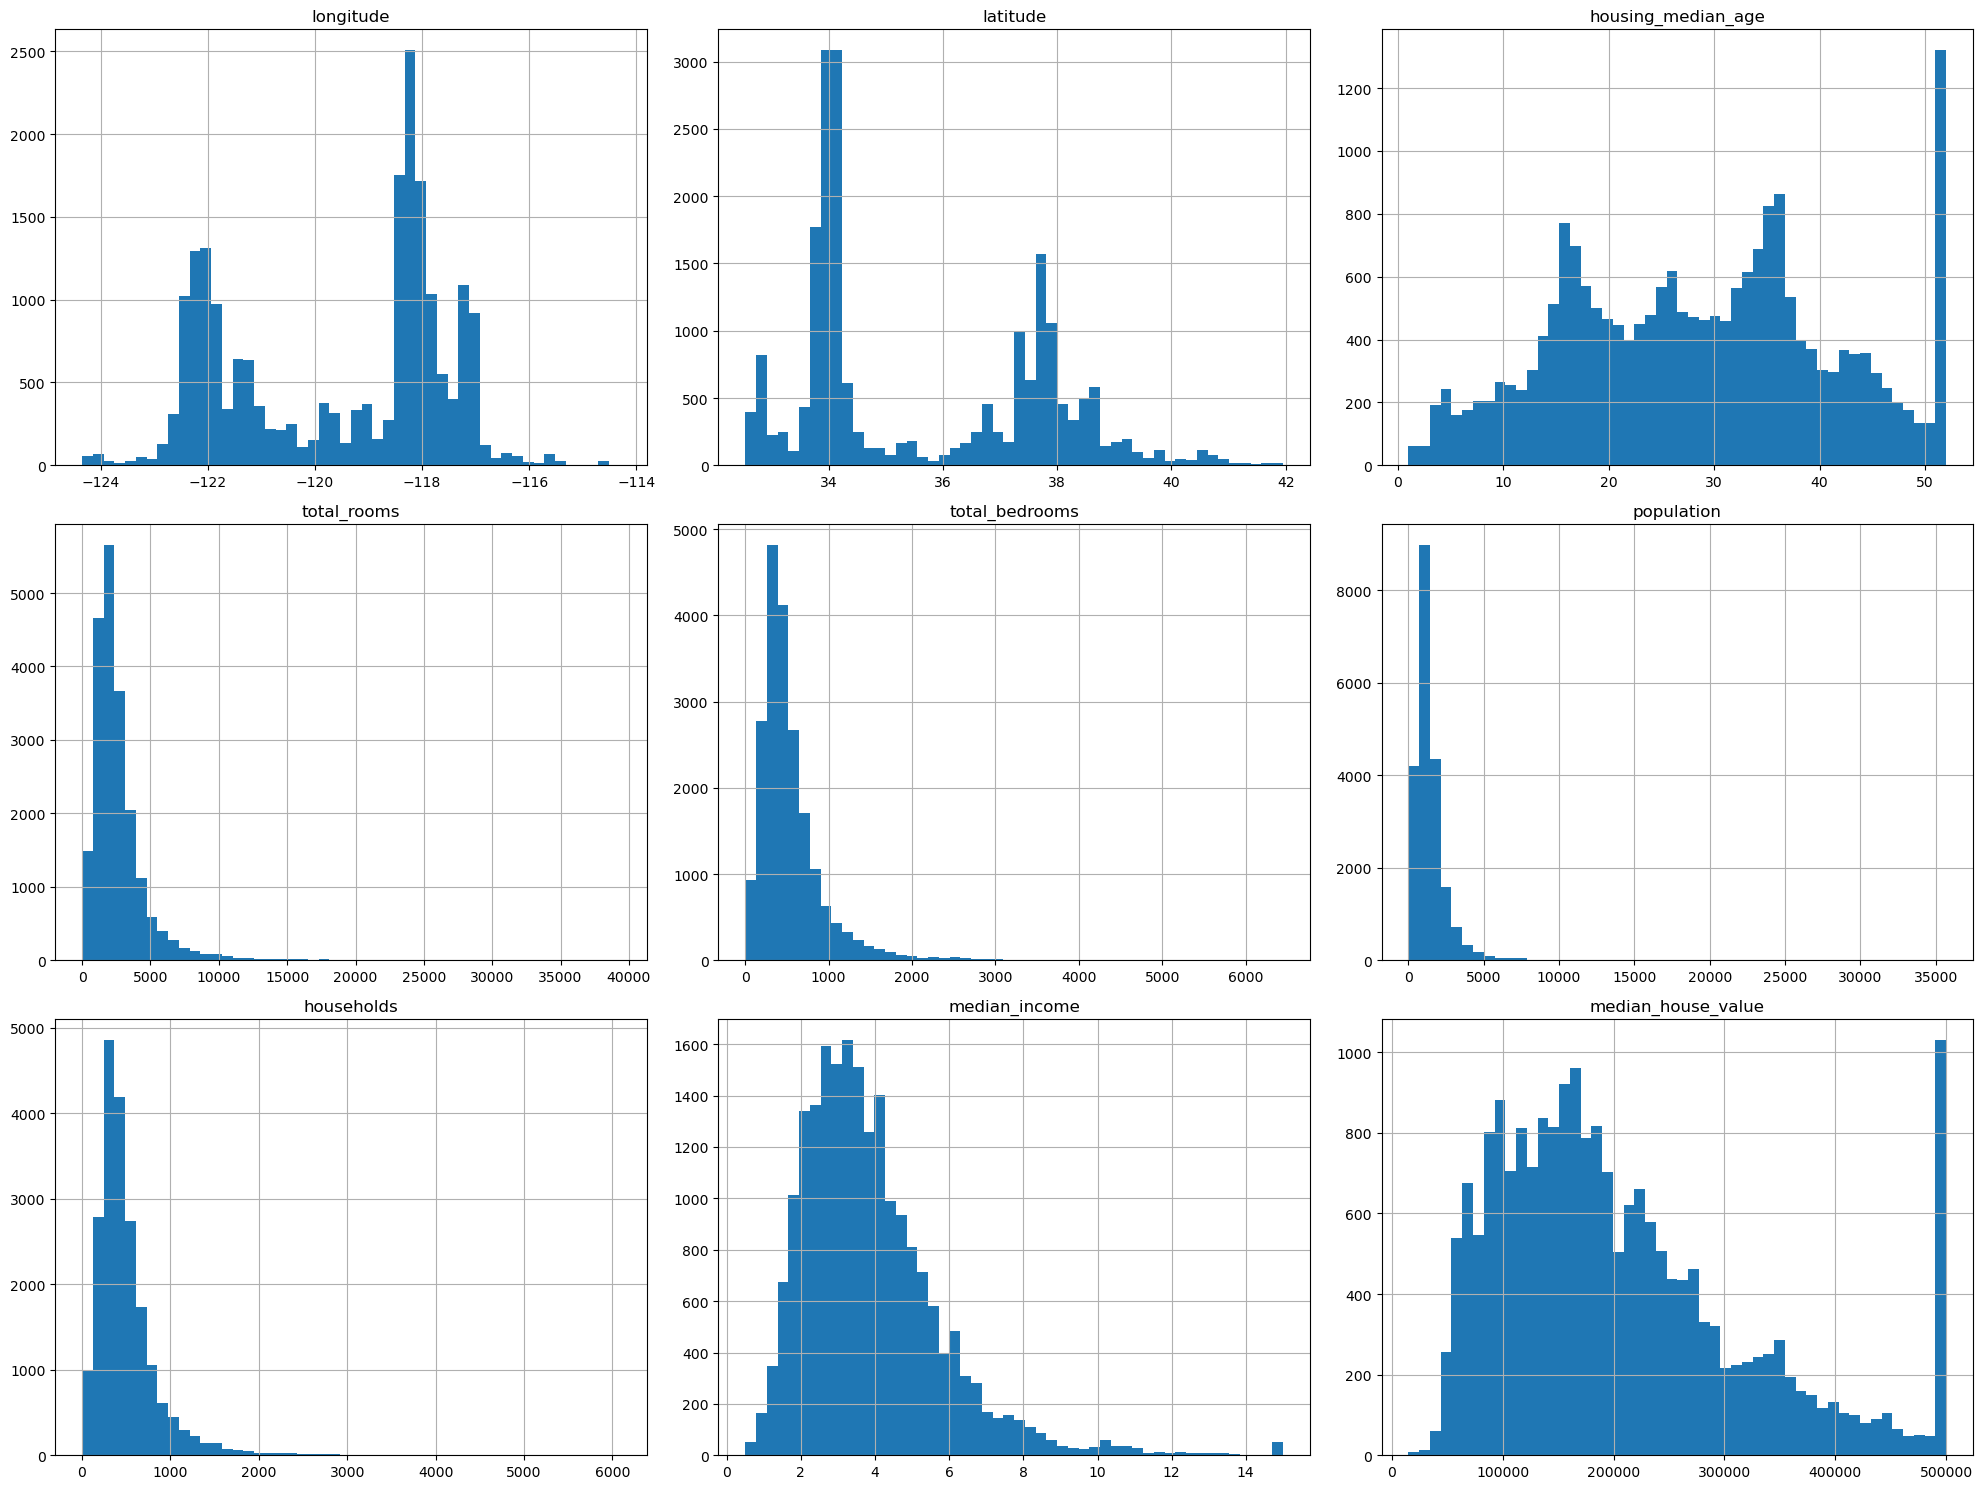

In [622]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

Tail Heavy histograms


# Create Test Set

split test set
leave aside validation set for reducing generalization error.


In [627]:
#create the function Split_train_test for splitting training & test dataset.
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices= np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [629]:
#Call Split_train_test function to create train & test sets with 20% of the housing dataset being test set
train_set, test_set = split_train_test(df, 0.2)
len(train_set)
print(train_set)
len(test_set)
print(test_set)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
10972    -117.84     33.76                  14         1458           423.0   
1713     -122.32     38.01                  26         3054           492.0   
10286    -117.83     33.89                  25         1737           270.0   
1612     -122.08     37.87                  26         2405           564.0   
19181    -122.61     38.42                  13         7731          1360.0   
...          ...       ...                 ...          ...             ...   
17571    -121.93     37.32                  51         2711           728.0   
9929     -122.32     38.29                  21         1607           356.0   
14403    -117.25     32.78                  36         1527           427.0   
7951     -118.15     33.86                  34         2403           413.0   
18685    -121.83     37.02                  22         1903           350.0   

       population  households  median_income  media

Well..above 20% test_set creation was pretty straightforward, but concern is..next time you call this function, it will generate different test set. you do not want that. Over time, your ML algo will go through whole set, which you do not want.

Solution 1: Save the test set on the first run & load it in subsequent runs & that cycle continues
Solution 2: Set random number generator seed (np.random.seed(100))before you call np.random.permutation()
So that it always generates  the same shuffled indices.

Both Solution 1 & 2 will not work if an updated dataset arrives. How do I make sure I have a stable train/test split even after the incoming dataset is new?
you want to use each instance's unique & immutable identifier.

How ? Example
compute a hash of each instance's identifier & put that instance in the test set If the hash is <=20% of the maximum hash value, then the test set will remain consistent across all parallel runs, even if you refresh your dataset regularly.
The test set will contain 20% of the new instances, but it will not pick any of the instances that were previously existing in the training set.  
Assumption: Instances Identifiers are unique & immutable.

In [635]:
#Below is the function checking the instance hash value threshold
from zlib import crc32
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

#Below is the function for calling above function & creating housing test set with ID(Hash value based)
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

The dataset here has no ID column as such, so we will pass  row index as id for housing dataset using df.reset_index().
In next step I would have a mechanism to create 20% guaranteed No-repeat test set & remaining 80% of instance ready as training data set.

In [638]:
df_with_id = df.reset_index()
train_set, test_set = split_train_test_by_id(df_with_id, 0.2, "index")
print(train_set)
print (test_set)

       index  longitude  latitude  housing_median_age  total_rooms  \
0          0    -122.23     37.88                  41          880   
1          1    -122.22     37.86                  21         7099   
3          3    -122.25     37.85                  52         1274   
4          4    -122.25     37.85                  52         1627   
6          6    -122.25     37.84                  52         2535   
...      ...        ...       ...                 ...          ...   
20635  20635    -121.09     39.48                  25         1665   
20636  20636    -121.21     39.49                  18          697   
20637  20637    -121.22     39.43                  17         2254   
20638  20638    -121.32     39.43                  18         1860   
20639  20639    -121.24     39.37                  16         2785   

       total_bedrooms  population  households  median_income  \
0               129.0         322         126         8.3252   
1              1106.0        24

Assumption : Make sure all the new or fresh dataset gets appended to the last feed & No row ever gets deleted.
If its unrealistic, then use most stable feature to build the unique & immutable ID for computing the hash values out of.
For example ( in this case Lattitude & Longitude ) - won't change in next eternity( unless world needs recalibrating after a huge shrink in earth's size  !!!!)
Let's try this option too.

In [641]:
# Ensure df_with_id is a copy of df
df_with_id = df.copy()

# Create a unique id using longitude and latitude
df_with_id["id"] = (df["longitude"] * 1000 + df["latitude"]).astype(int)

# Perform the train-test split
train_set, test_set = split_train_test_by_id(df_with_id, test_ratio=0.2, id_column="id")




Let's discuss quickly on how sklearn enables train test split
sklearn provides 2 functions ( Don't go confused)
1. train_test_split() -
-----------------------------
#This one has random_state parameter for random seed genration ( we will use this one) + we can pass multiple datasets with an identical number of rows  that can be split on same indices ( Good for cases where each label/class  of dataset gets fresh dataset to learn from.

2. split_train_test()  -
--------------------------------
#This one only splits dataset to train  & test set

In [644]:
from sklearn.model_selection import train_test_split
train_set, test_set, = train_test_split(df, test_size=0.2, random_state=42)

So far we have considered purely random sampling methods.
Principle to use Random Sampling, is if your Dataframe is of size RxC ( Row x Column) & R is not too bigger than C ( Not too long dataset, rather smaller dataset)
In case you do not follow above principle, it would introduce Sampling Bias.

Its better to do Stratified Sampling, ( X% from class A, y% from class B etc.)

The data population is divided into well balanced  homogenous subgroups ( Strata) ensuring test set is representative of overall population, so we do not want skewed test set.

Let's discuss income as an important feature for housing prices.
income is a continuous attribute & average of income is not a very effectively engineered feature, if there are lot of outliers reside in the dataset.


Median is a better option in such cases, even for contonuous variables ( Not just for categorical variables)

Let's say, you realize median income is an important attribute to predict better median housing prices

you want to make sure that the test set is representative of various income categories/backets  or bands  to avoid overfitting or underfitting problem.

Note of Caution : Not too many strata, rather each stratum should be large enough

In [652]:
#df["income_cat"] = pd.cut(df["median_income"], bins[0., 1.5, 3.0, 4.5, 6., np.inf], labels[1, 2, 3, 4, 5])
#df["income_cat"] = pd.cut(df["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
import pandas as pd
import numpy as np

# Create income categories based on "median_income"
df["income_cat"] = pd.cut(
    df["median_income"], 
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf], 
    labels=[1, 2, 3, 4, 5]
)

# Verify the created income categories
print(df["income_cat"].value_counts())


income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64


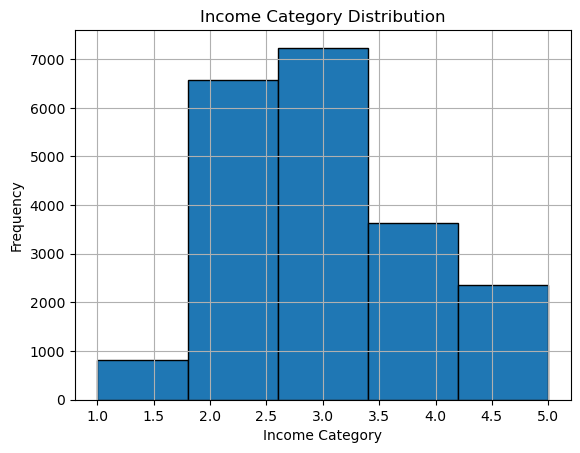

In [654]:
#df["income_cat"].hist() # Plot a histogram on the income categeory attribute to understand the income distribution per category

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example DataFrame setup
#df = pd.DataFrame({
 #   "median_income": [1.0, 2.0, 3.5, 5.0, 7.0]
#})#

# Categorize "median_income"
df["income_cat"] = pd.cut(
    df["median_income"], 
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf], 
    labels=[1, 2, 3, 4, 5]
)

# Convert categories to integers
df["income_cat"] = df["income_cat"].astype(int)

# Plot the histogram
df["income_cat"].hist(bins=5, edgecolor='black')
plt.title("Income Category Distribution")
plt.xlabel("Income Category")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


Scikit-learn lets you stratify the sample with a function as below

In [657]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]


Let's see what happened now !


In [660]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [662]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29,6447,1012.0,2184,960,8.2816,500001,<1H OCEAN,5
17352,-120.42,34.89,24,2020,307.0,855,283,5.0099,162500,<1H OCEAN,4
3505,-118.45,34.25,36,1453,270.0,808,275,4.3839,204600,<1H OCEAN,3
7777,-118.10,33.91,35,1653,325.0,1072,301,3.2708,159700,<1H OCEAN,3
14155,-117.07,32.77,38,3779,614.0,1495,614,4.3529,184000,NEAR OCEAN,3


In [664]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29,3873,797.0,2237,706,2.1736,72100,INLAND,2
15502,-117.23,33.09,7,5320,855.0,2015,768,6.3373,279600,NEAR OCEAN,5
2908,-119.04,35.37,44,1618,310.0,667,300,2.8750,82700,INLAND,2
14053,-117.13,32.75,24,1877,519.0,898,483,2.2264,112500,NEAR OCEAN,2
20496,-118.70,34.28,27,3536,646.0,1837,580,4.4964,238300,<1H OCEAN,3


Now you have created a stratified training set & a stratified test set.
It's time to return original dataset( No stratification) , so you need to remove the income_cat attribute, so you can perform analysis on actual undisturbed dataset

In [667]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [669]:
df.head()#income_cat attribute is removed now as you see below

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,5
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,5
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,5
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,4
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,3


Let's first visualize the data, before you start making corelations
So before you visualize, put the test set aside & start playing with only training set you generated.
If the training set is qite large, then you can take a further split on exploration set, but I would avoid that as of now
I am not harming the training set, hence am mot playing around with full training set, I am making an identical copy of it to play around with as below.

In [672]:
df = strat_train_set.copy()

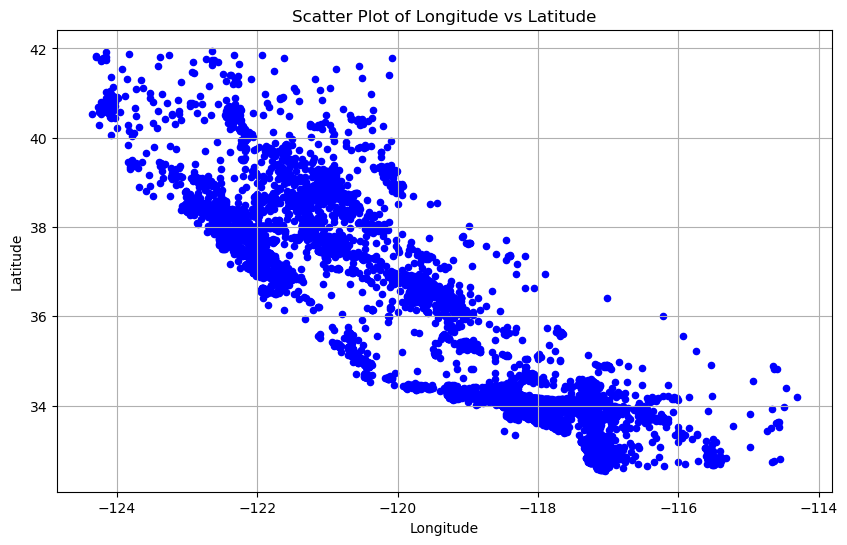

In [674]:
#Now create a scatter plot on the training set, scatter plot, as I want to understand data attribute/ feature correlation.
df.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    #alpha=0.1,
    figsize=(10, 6),
    color="blue"
)

# Adding labels and title
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Scatter Plot of Longitude vs Latitude")
plt.grid(True)
plt.show()

Plot looks OK, but not helpful in seeing a specific pattern, too much congested.
Since I want to distinguish the desnsities of pattern, I would make alpha = 0.1 as  below.


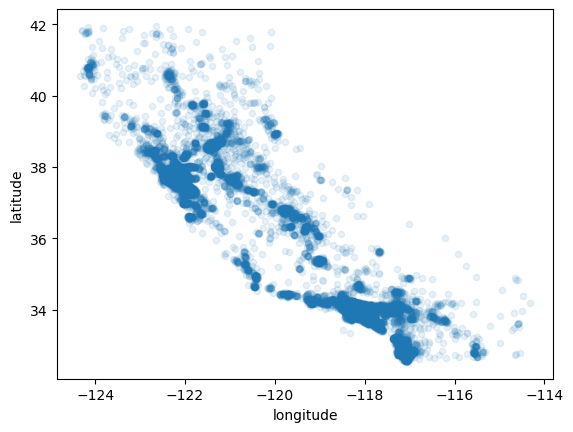

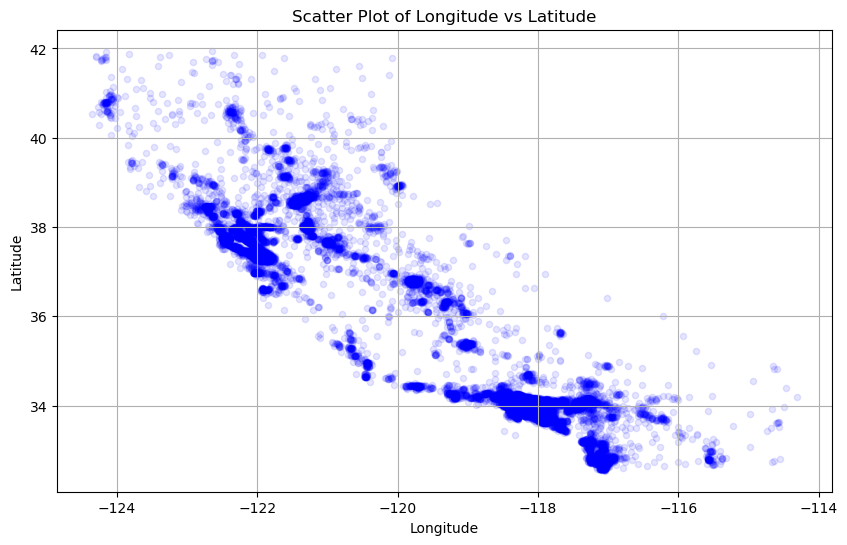

In [677]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
df.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.1,
    figsize=(10, 6),
    color="blue"
)

# Adding labels and title
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Scatter Plot of Longitude vs Latitude")
plt.grid(True)
plt.show()

Let's use Colormap called jet (Predefined color map)
S= Population  , c = Median Price
Radius reprsents circle size
Color repesents price (Blue to red)
Blue = low Price
Red = High Price

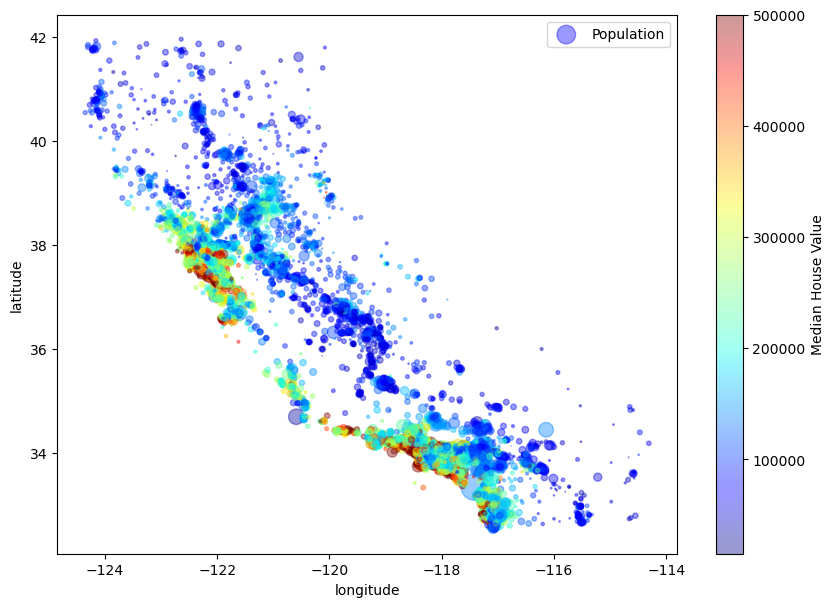

In [680]:
import matplotlib.pyplot as plt

# Scatter plot with colorbar and other customizations
scatter = df.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.4,
    s=df["population"] / 100,  # Marker size proportional to population
    label="Population",
    figsize=(10, 7),
    c="median_house_value",  # Color represents median house value
    cmap=plt.get_cmap("jet"),  # Colormap
    colorbar=False  # Exclude the automatic colorbar
)

# Adding a colorbar manually
cbar = plt.colorbar(scatter.get_children()[0], ax=scatter, label="Median House Value")
plt.legend()
plt.show()

Above Tells me, Its more red at the coastal area i.e. houses in coastal area has higher price
population is more & price is less ( bigger circle with Blue) away from coastline.

Now lets try & correlate features


In [684]:
# Compute the correlation matrix
corr_matrix = df[["housing_median_age", "median_house_value", "median_income", "population", "households", "total_rooms", "total_bedrooms"]].corr()
corr_matrix["median_house_value"].sort_values(ascending=False)
# Display the correlation matrix (optional)
print(corr_matrix)

                    housing_median_age  median_house_value  median_income  \
housing_median_age            1.000000            0.114146      -0.111315   
median_house_value            0.114146            1.000000       0.687151   
median_income                -0.111315            0.687151       1.000000   
population                   -0.298737           -0.026882       0.002421   
households                   -0.306473            0.064590       0.010869   
total_rooms                  -0.364535            0.135140       0.200133   
total_bedrooms               -0.325101            0.047781      -0.009643   

                    population  households  total_rooms  total_bedrooms  
housing_median_age   -0.298737   -0.306473    -0.364535       -0.325101  
median_house_value   -0.026882    0.064590     0.135140        0.047781  
median_income         0.002421    0.010869     0.200133       -0.009643  
population            1.000000    0.904639     0.855103        0.876324  
households   

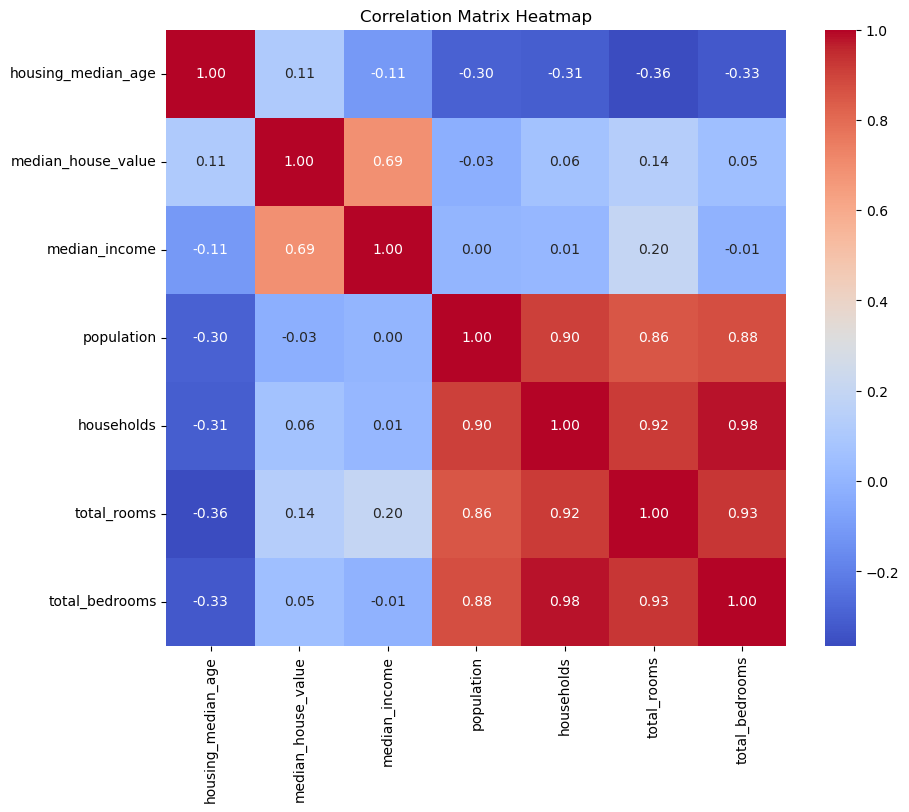

In [686]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

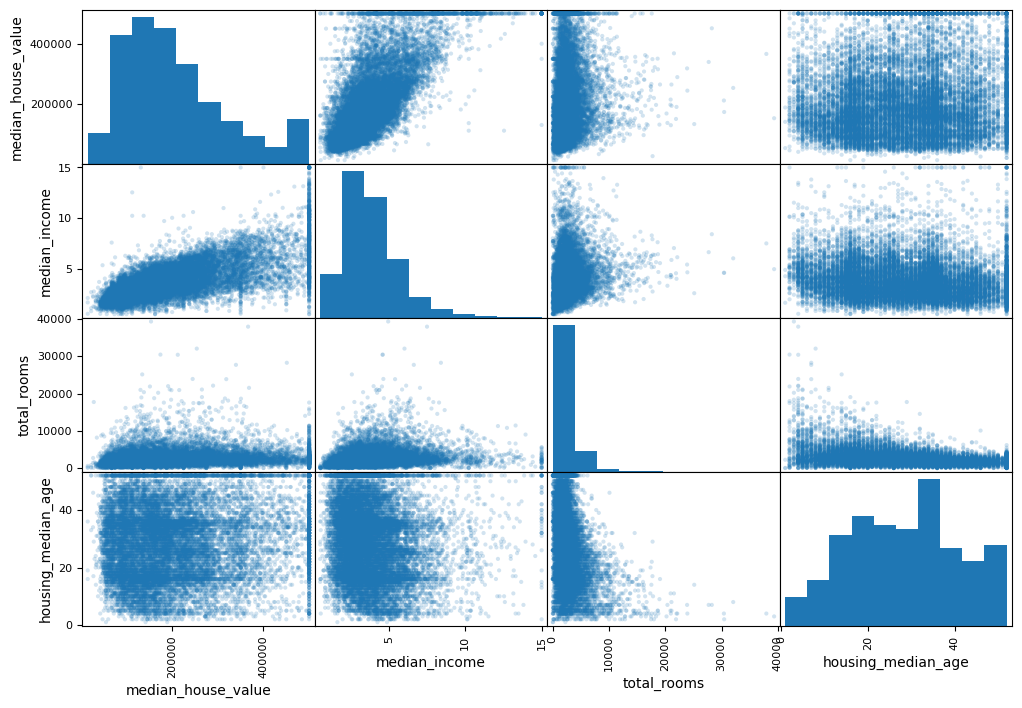

In [688]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Define the attributes for the scatter matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

# Create the scatter matrix
scatter_matrix(df[attributes], figsize=(12, 8), alpha=0.2, diagonal="hist")

# Display the plot
plt.show()

The most promising attribute to predict the median house value is the median income..
same formula but with alpha option now

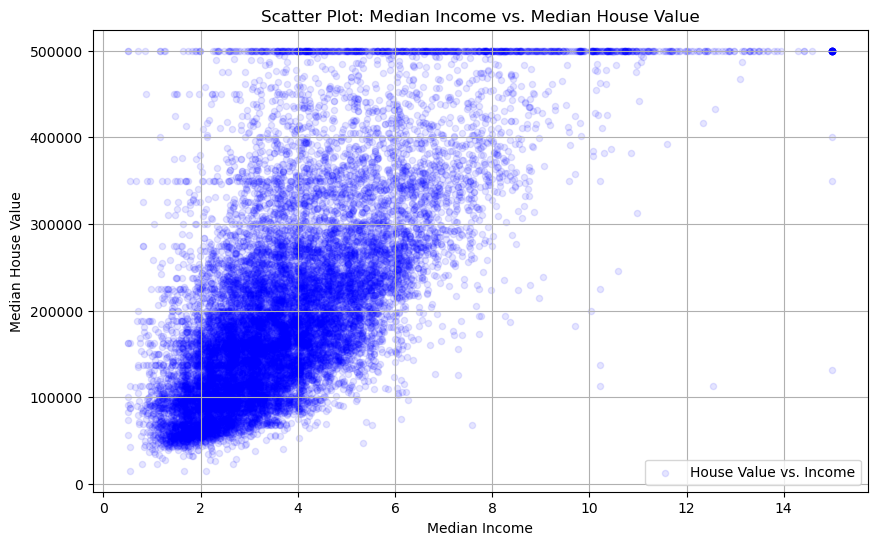

In [691]:
import matplotlib.pyplot as plt

# Scatter plot of median_income vs. median_house_value
df.plot(
    kind="scatter",
    x="median_income",
    y="median_house_value",
    alpha=0.1,
    figsize=(10, 6),
    color="blue",
    label="House Value vs. Income"
)

# Adding labels and title
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Scatter Plot: Median Income vs. Median House Value")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Let's see what this zooming reveals now.'
There is a solid correlation and an upward trend & the points are not too dispersed.
The price cap is visible at about $ 500,000.
Also, we can see 2-3 more less visible price cap lines.
Around $450000 and 50000 and $280000
So, you may want to segregate to see the distinction triggering the price cap by region.


  Let's try above workout with few other attributes such as number of rooms per household, number of bedrooms, population per household.

In [695]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_unit"] = df["total_bedrooms"] / df["total_rooms"]
df["popuation_per_household"] = df["population"] / df["households"]


In [697]:
# Compute the correlation matrix
corr_matrix = df[["housing_median_age", "median_house_value", "median_income", "population", "households", "total_rooms", "total_bedrooms"]].corr()
corr_matrix["median_house_value"].sort_values(ascending=False)
# Display the correlation matrix (optional)
print(corr_matrix)

                    housing_median_age  median_house_value  median_income  \
housing_median_age            1.000000            0.114146      -0.111315   
median_house_value            0.114146            1.000000       0.687151   
median_income                -0.111315            0.687151       1.000000   
population                   -0.298737           -0.026882       0.002421   
households                   -0.306473            0.064590       0.010869   
total_rooms                  -0.364535            0.135140       0.200133   
total_bedrooms               -0.325101            0.047781      -0.009643   

                    population  households  total_rooms  total_bedrooms  
housing_median_age   -0.298737   -0.306473    -0.364535       -0.325101  
median_house_value   -0.026882    0.064590     0.135140        0.047781  
median_income         0.002421    0.010869     0.200133       -0.009643  
population            1.000000    0.904639     0.855103        0.876324  
households   

In [699]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
Name: median_house_value, dtype: float64

Looks like bedrooms_per_unit has a significant negative correlation i.e. Price is more as Bedrooms_per_unit is less

Remember ..its an uterative process

Let's now prepare a clear dataset.
Data cleaning.

Most ML algorithms cannot work with missing features. So let's create few functions to take care of them.
We see lot of missing values per attribute

Option 1 : Get rid of the attributes/features with missing values. ( Drop columns) - drop()
Option 2 : Get rid of the partitions where the missing values mostly lie in (Drop Rows) - dropna()
Option 3 : convert missing values to something acceptable. ideally the median values - fillna()

In [705]:
#Option_1: Get rid of corresponding instances that has "total_bedrooms" feature with missing values. [Modify the content, remove instances/ records]
# check missing values before dropping the instance 
print("Missing values in 'total_bedrooms':", df["total_bedrooms"].isna().sum())

Missing values in 'total_bedrooms': 158


In [707]:
df_cleaned_drop_instance = df.dropna(subset=["total_bedrooms"])
df_cleaned_drop_instance.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_unit,popuation_per_household
12655,-121.46,38.52,29,3873,797.0,2237,706,2.1736,72100,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7,5320,855.0,2015,768,6.3373,279600,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44,1618,310.0,667,300,2.8750,82700,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24,1877,519.0,898,483,2.2264,112500,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27,3536,646.0,1837,580,4.4964,238300,<1H OCEAN,6.096552,0.182692,3.167241


In [709]:
print("Missing values in 'total_bedrooms':", df_cleaned_drop_instance["total_bedrooms"].isna().sum())

Missing values in 'total_bedrooms': 0


In [711]:
# Options #_2: Get rid of the attribute "total_bedrooms" itself [ Modify the structure, remove features/ attributes/ columns]
if "total_bedrooms" in df.columns:
    df_cleaned_drop_feature = df.drop("total_bedrooms", axis=1)
else:
    print("Column 'total_bedrooms' does not exist.")

#df.drop("total_bedrooms", axis = 1)
#axis = 1, for operating on the column/ feature
#axis = 0, for operating on the row/ instance

In [713]:
if "total_bedrooms" in df_cleaned_drop_feature.columns:
    df_cleaned_drop_feature.head(20)
else:
    print("Column 'total_bedrooms' does not exist.")

Column 'total_bedrooms' does not exist.


In [715]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_unit,popuation_per_household
12655,-121.46,38.52,29,3873,797.0,2237,706,2.1736,72100,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7,5320,855.0,2015,768,6.3373,279600,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44,1618,310.0,667,300,2.8750,82700,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24,1877,519.0,898,483,2.2264,112500,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27,3536,646.0,1837,580,4.4964,238300,<1H OCEAN,6.096552,0.182692,3.167241


In [717]:
# Options #_3: Set the values to some default values [No change to instances or features permanently, but modify the feature with 
#default values for all such instances] 
#Default values [Median], as Total_bedroom is a categorical attribute|#Median values calculated, ignoring missing values

#| Replace NULL values with median values| Modify the data frame directly without creating another copy ( If you are comfortable with the approach)
pd.set_option('future.no_silent_downcasting', True)
print("Missing values before:", df["total_bedrooms"].isna().sum())
df["total_bedrooms"]=df["total_bedrooms"].fillna(median)
print("Missing values after:", df["total_bedrooms"].isna().sum())



Missing values before: 158
Missing values after: 0


In [719]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_unit,popuation_per_household
12655,-121.46,38.52,29,3873,797.0,2237,706,2.1736,72100,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7,5320,855.0,2015,768,6.3373,279600,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44,1618,310.0,667,300,2.8750,82700,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24,1877,519.0,898,483,2.2264,112500,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27,3536,646.0,1837,580,4.4964,238300,<1H OCEAN,6.096552,0.182692,3.167241


use Imputer strategy for missing value replacement


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

Now understand... median gets applied on only numerical attributes, hence you need to create copy of the data without the text attributes ocean_proximity

In [ ]:
df_num=df.drop("ocean_proximity", axis=1)

In [ ]:
imputer.fit(df_num)

SimpleImputer(strategy='median')

In [ ]:
df_num.median()

longitude                    -118.510000
latitude                       34.260000
housing_median_age             29.000000
total_rooms                  2119.000000
total_bedrooms                433.000000
population                   1164.000000
households                    408.000000
median_income                   3.541550
median_house_value         179500.000000
rooms_per_household             5.232342
bedrooms_per_unit               0.203027
popuation_per_household         2.817661
dtype: float64

In [ ]:
X= imputer.transform(df_num)

In [ ]:
df_tr= pd.DataFrame(X, columns=df_num.columns, index=df_num.index)

Let's now handle text & categorical attributes

In [726]:
df_cat=df[["ocean_proximity"]]
df_cat.head()

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


Ocean_proximity holds limited possible values that represents categories such as <1H OCEAN, INLAND, NEAR OCEAN etc. We can call this attribute categorical/ Non-Numerical. Usually ML algorithms work comfortably with numbers, which means, we need to convert the categories( text) to numbers.

In [730]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
df_cat_encoded = ordinal_encoder.fit_transform(df_cat)
df_cat_encoded[:10]


array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [732]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Above array is a list containing a ID array of categories for each categorical attribute.
In this case a single array since there is just 1 categorical attribute. We can get the list of categories by using categories instance variable.

With this categorization, issue is ML algorithm cannot differentiate one category to another that well.
For ordered/ ranked clategories ( Good, bad , average) it may still work, but for distinct / mutually exclusive categories, it may not even work that well.
To fix this issue a common solution is to create one binary attribute per category. [ One attributr equal to 1 when the category is "<1H OCEAN" ( 0 otherwise),


In [734]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
df_cat_1hot = cat_encoder.fit_transform(df_cat)
df_cat_1hot




<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [736]:
df_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

Above is a Scipy sparse matrix, instead of a numpy array. This is very much required with dataset containing attributes with thousands of ctegories.

Custom Transformers

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
           bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
           return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
           return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(df.values)






Feature Scaling